<a href="https://colab.research.google.com/github/binayak13swain/MCA-activitys-assingment-/blob/main/MILKDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [ ]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [ ]:
df.shape

(168, 2)

In [ ]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<Axes: xlabel='Date'>

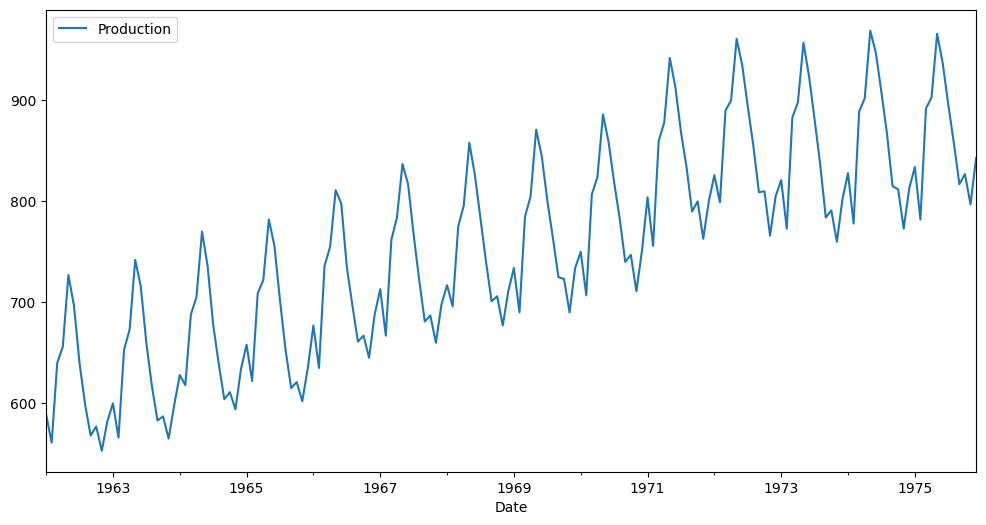

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

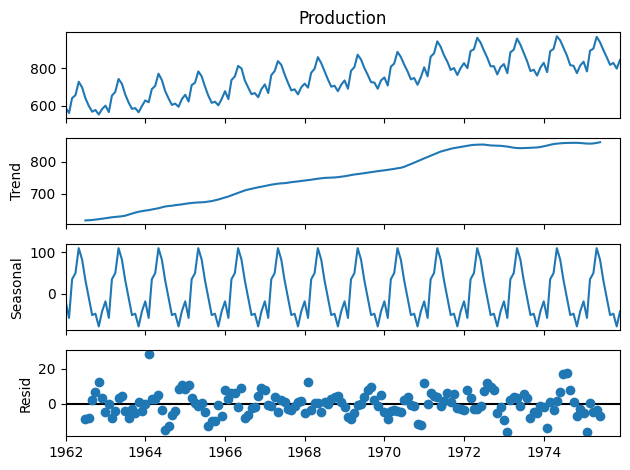

In [ ]:
result = seasonal_decompose(df['Production'])
result.plot();

In [ ]:
len(df)

168

In [ ]:
train= df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]


array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=n_input,batch_size=1)

In [ ]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01923077 0.20913462 0.24759615]
Predict this y: 
 [[0.41826923]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
n_input =12
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=n_input,batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0018
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step -

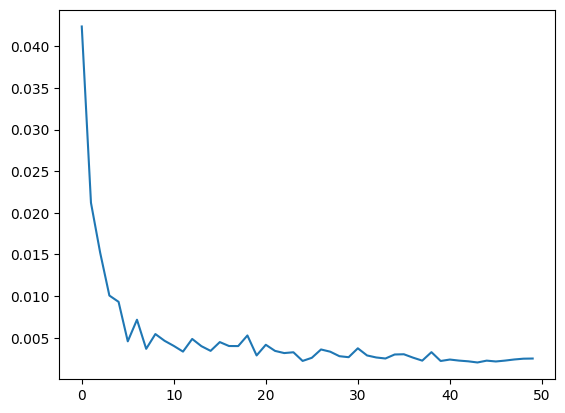

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


array([[0.6433449]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
test_predictions

[array([0.6433449], dtype=float32),
 array([0.5823485], dtype=float32),
 array([0.77868307], dtype=float32),
 array([0.8189467], dtype=float32),
 array([0.93549466], dtype=float32),
 array([0.9119037], dtype=float32),
 array([0.8447144], dtype=float32),
 array([0.75464296], dtype=float32),
 array([0.64299935], dtype=float32),
 array([0.61176425], dtype=float32),
 array([0.54105836], dtype=float32),
 array([0.58693266], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[820.63146973],
       [795.25698662],
       [876.93215561],
       [893.68183517],
       [942.16577911],
       [932.35193062],
       [904.40119171],
       [866.93147278],
       [820.48773003],
       [807.49392891],
       [778.0802784 ],
       [797.16398621]])

In [ ]:
test['predictions'] = true_predictions

<ipython-input-50-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


<Axes: xlabel='Date'>

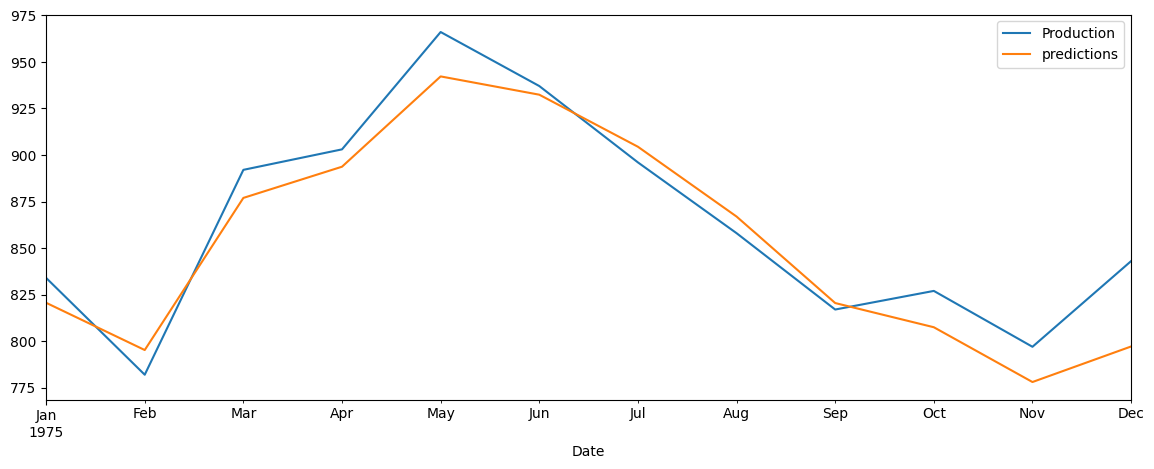

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Production'],test['predictions']))
print(rmse)

18.841236656062677
